# Introduction to Artificial Intelligence for Non Computing

## Practical 2 (weeks 3 - 4)

## Search Techniques

The following links provide additional information about depth first search and breath first search

- Depth first search:   link：https://pan.baidu.com/s/1bkLHKKbSBNpfFuKwDyURqw  password：oy76
- Breath first search:  link：https://pan.baidu.com/s/176g5q0W3rGbSAM5tZMraeg   password：7mdh

#### Theory Questions 

1\. What is an algorithm? A sequence of steps such as a recipe or a movie script.

As a movie viewer, please write an algorithm for a process to "see a movie". Include details of the following for example (add additional information yourself):
	- The start conditions 
	-- I want to watch a movie
	- Roles (people/actors involved) 
    --watcher, ticket seller etc 
    -Equipment required ("props")
    --seats, ticket etc
    - The scenes 
    -- scene 1 - buy ticket 
    -- ??? what happens next
    -- scene 3, scene 3 ...
    - Results/outcomes
    -- ?


In [12]:
def buyTicket(curMoney,ticketPrice):
    if (curMoney>ticketPrice):
        curMoney = curMoney - ticketPrice
        print('Buy a ticket.')
        return 1
    else:
        print('Cannot afford the ticket.')
        return 0
    
def checkTicket(ticket):
    if (ticket==1):
        print('Ticket is ready.')
        return True
    else:
        print('Cannot find a ticket.')
        return False

def watchMovie():
    print('Watching movie...')

def leave():
    print('Leave the cinema.')
    
ticket = buyTicket(200,10) 
if (checkTicket(ticket)):
    watchMovie()
leave()


Buy a ticket.
Ticket is ready.
Watching movie...
Leave the cinema.


2\. A farmer with his wolf, duck and bag of corn come to the east side of a river they wish to cross. There is a boat at the rivers edge, but of course only the farmer can row. The boat can only hold two things (including the rower) at any one time. If the wolf is ever left alone with the duck, the wolf will eat it. Similarly if the duck is ever left alone with the corn, the duck will eat it. How can the farmer get across the river so that all four arrive safely on the other side? 

1st: bring the duck to the right
2nd: go back with nothing
3rd: bring the wolf to the right
4th: go back with the duck
5th: bring the corn to the right
6th: go back with nothing
7th: bring the duck to the right
Completed.

***

3\.Explain why we determine our problem goals before we write the problem formulation (including the model and deciding what algorithm or techniques to use - for example search, or other method).

See Chapter3.1 (Russel & Norvig)

Goal formulation, based on the current situation and the agent’s performance measure, is the ﬁrst step in problem solving.

****

4\. This question requires you to perform BFS and DFS on paper.

<img src="img/p1.png" width="180" height="180" >

1. Simulate (on pencil-and-paper) breadth-first search starting from node A when the goal node is K.
2. Simulate (on pencil-and-paper) depth first search starting from node A when the goal node is I.


1. ABCDEFGHIK
2. ABDHI

5\.Consider a state space where the start state is number 1 and each state  k has two successors: numbers 2k and 2k + 1.
- a. Draw the portion of the state space for states 1 to 15.
- b. Suppose the goal state is 11. List the order in which nodes will be visited for breadthfirst
search, depth-limited search with limit 3, and iterative deepening search.
- c. How well would bidirectional search work on this problem? What is the branching
factor in each direction of the bidirectional search?
- d. Does the answer to (c) suggest a reformulation of the problem that would allow you to
solve the problem of getting from state 1 to a given goal state with almost no search?
- e. Call the action going from k to 2k Left, and the action going to 2k + 1 Right. Can you
find an algorithm that outputs the solution to this problem without any search at all?

See textbook Chapter3.15

a. 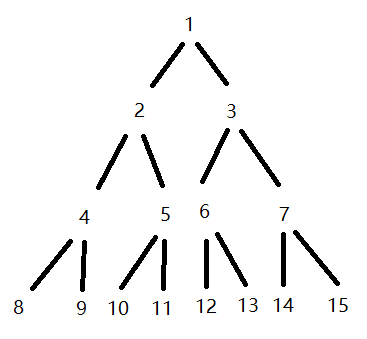
b. 
    BFS:1,2,3,4,5,6,7,8,9,10,11
    DLS:1,2,5,11
c.  the complexity is O(2^(2/2)), branching factor is 2.
d.  yes, the complexity under this situation is low(O(k)).
e.  yes.

### Programming Excercises

1\.Write a program to solve a classic ancient Chinese puzzle:  
 We count 35 heads and 94 legs among the chickens and rabbits in a farm. How many rabbits and how many chickens do we have? 

In [2]:
for x in range(35):
    y = 35 - x
    if (2 * x + 4 * y == 94):
        print('chicken: %i rabbits: %i' % (x,y))

chicken: 23 rabbits: 12


2\. _Social networking_ Please look at the graph below of social relationships. You have a mango farm, you need to find a mango buyer and sell him your mango that you have grown (just a small farm). To this end, our principle is to use our social network of friends separated by one degree, and then second degree friends (friends of friends), third degree friends (friends of friends of friends).

Use the depth first algorithm to search your network until you find a mango seller. 

We make an assumption that if the person's name ends with m, then it means the person must be the mango seller!


<img src="img/p3.png" width="500" height="400" >

In [15]:
def traverse(list):
    for i in list:
        if(customer(i)):
            print(i)
        else:
            traverse(dfs_mango[i])

def customer(str):
    if (str[-1] == 'm'):
        return True
    else:
        return False

dfs_mango = {
    'you': ['bob', 'alice', 'claire'],
    'bob': ['anuj', 'peggy'],
    'anuj': [],
    'peggy': [],
    'alice': ['peggy'],
    'claire': ['thom', 'jonny'],
    'thom': [],
    'jonny': []
}

traverse(dfs_mango['you'])


thom


3\. Depth First traverse：Use depth first traversal to traverse all the DLL files on the C disk and output the file names.

Update your code to search for a particular filename.

What protocol did you use to select the next node to expand on the fringe?

In [13]:
import os
class DFS:
    def __init__(self,path):
        self.path = path
        self.MyList =[]
        self.MyList.append(self.path)

    def traverse(self):
        while len(self.MyList) !=0:
            path =self.MyList.pop()
            if os.path.isdir(path):
                # print("folder",path)
                myFileList =os.listdir(path)
                for line in myFileList:
                    myPath =path+"\\"+line
                    if os.path.isdir(myPath):
                        self.MyList.append(myPath)
                    else:
                        file = os.path.splitext(myPath)
                        fliename, type = file
                        if (type == '.dll'):
                            print('file', myPath)
            else:
                file = os.path.splitext(path)
                fliename, type = file
                if (type == '.dll'):
                    print('file',path)

    def __del__(self):
        pass

path =r"C:\\"
file = DFS(path)
file.traverse()

file C:\\\Windows\pyshellext.amd64.dll
file C:\\\Windows\RtlExUpd.dll
file C:\\\Windows\SECOH-QAD.dll
file C:\\\Windows\twain_32.dll
file C:\\\Windows\WinSxS\x86_wpf-presentationhostproxy_31bf3856ad364e35_10.0.17134.1_none_b3ed07802a9c121f\PresentationHostProxy.dll
file C:\\\Windows\WinSxS\x86_wcf-system.servicemodel_b03f5f7f11d50a3a_10.0.17134.254_none_d5ff175e12d127c0\System.ServiceModel.dll
file C:\\\Windows\WinSxS\x86_wcf-system.servicemodel_b03f5f7f11d50a3a_10.0.17134.1_none_d1ef184a827a31d2\System.ServiceModel.dll
file C:\\\Windows\WinSxS\x86_wcf-system.servicemodel_b03f5f7f11d50a3a_10.0.17134.165_none_d600010412d05a67\System.ServiceModel.dll
file C:\\\Windows\WinSxS\x86_wcf-system.runtime.serialization_b03f5f7f11d50a3a_10.0.17134.254_none_c847077248116a0e\System.Runtime.Serialization.dll
file C:\\\Windows\WinSxS\x86_wcf-system.runtime.serialization_b03f5f7f11d50a3a_10.0.17134.1_none_c437085eb7ba7420\System.Runtime.Serialization.dll
file C:\\\Windows\WinSxS\x86_wcf-system.runtime

file C:\\\Windows\WinSxS\x86_netfx4-microsoft.internal.tasks.dataflow_b03f5f7f11d50a3a_4.0.15671.0_none_28b2ebdb6771488b\Microsoft.Internal.Tasks.Dataflow.dll
file C:\\\Windows\WinSxS\x86_netfx4-microsoft.csharp_b03f5f7f11d50a3a_4.0.15671.0_none_0e4b3abea03268c3\Microsoft.CSharp.dll
file C:\\\Windows\WinSxS\x86_netfx4-microsoft.csharp.resources_b03f5f7f11d50a3a_4.0.15671.0_zh-cn_c22ee56a7750f84a\Microsoft.CSharp.resources.dll
file C:\\\Windows\WinSxS\x86_netfx4-installutillib_dll_b03f5f7f11d50a3a_4.0.15671.0_none_4a50b4105918ab81\InstallUtilLib.dll
file C:\\\Windows\WinSxS\x86_netfx4-fusion_dll_b03f5f7f11d50a3a_4.0.15671.0_none_5d971b96c568721d\fusion.dll
file C:\\\Windows\WinSxS\x86_netfx4-filetracker_b03f5f7f11d50a3a_4.0.15671.0_none_4135ad8bdc09d604\FileTracker.dll
file C:\\\Windows\WinSxS\x86_netfx4-filetrackerui_dll_ln_b03f5f7f11d50a3a_4.0.15671.0_none_fa98f831c3a07e1a\FileTrackerUI.dll
file C:\\\Windows\WinSxS\x86_netfx4-eventlogmessages_dll_b03f5f7f11d50a3a_4.0.15671.0_none_3669

file C:\\\Windows\WinSxS\x86_microsoft.web.management-nonmsil_31bf3856ad364e35_10.0.17134.1_none_b0c3e9a1cc16103d\Microsoft.Web.Management.dll
file C:\\\Windows\WinSxS\x86_microsoft.web.administration-nonmsil_31bf3856ad364e35_10.0.17134.1_none_51d2c3f541a3fbc4\Microsoft.Web.Administration.dll
file C:\\\Windows\WinSxS\x86_microsoft.visualbas..activities.compiler_b03f5f7f11d50a3a_4.0.15671.0_none_d25e3ba1cd5c18f8\Microsoft.VisualBasic.Activities.Compiler.dll
file C:\\\Windows\WinSxS\x86_microsoft.vc90.openmp_1fc8b3b9a1e18e3b_9.0.21022.8_none_ecdf8c290e547f39\vcomp90.dll
file C:\\\Windows\WinSxS\x86_microsoft.vc90.mfc_1fc8b3b9a1e18e3b_9.0.30729.1_none_dcc7eae99ad0d9cf\mfc90.dll
file C:\\\Windows\WinSxS\x86_microsoft.vc90.mfc_1fc8b3b9a1e18e3b_9.0.30729.1_none_dcc7eae99ad0d9cf\mfc90u.dll
file C:\\\Windows\WinSxS\x86_microsoft.vc90.mfc_1fc8b3b9a1e18e3b_9.0.30729.1_none_dcc7eae99ad0d9cf\mfcm90.dll
file C:\\\Windows\WinSxS\x86_microsoft.vc90.mfc_1fc8b3b9a1e18e3b_9.0.30729.1_none_dcc7eae99ad0d9

file C:\\\Windows\WinSxS\x86_microsoft-windows-s..ck-mof-onecoreadmin_31bf3856ad364e35_10.0.17134.281_none_9f1e5db7ccef29a4\esscli.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-s..ck-mof-onecoreadmin_31bf3856ad364e35_10.0.17134.281_none_9f1e5db7ccef29a4\fastprox.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-s..ck-mof-onecoreadmin_31bf3856ad364e35_10.0.17134.281_none_9f1e5db7ccef29a4\mofd.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-s..ck-mof-onecoreadmin_31bf3856ad364e35_10.0.17134.281_none_9f1e5db7ccef29a4\mofinstall.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-s..ck-mof-onecoreadmin_31bf3856ad364e35_10.0.17134.281_none_9f1e5db7ccef29a4\repdrvfs.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-s..ck-mof-onecoreadmin_31bf3856ad364e35_10.0.17134.281_none_9f1e5db7ccef29a4\wbemcomn.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-s..ck-mof-onecoreadmin_31bf3856ad364e35_10.0.17134.281_none_9f1e5db7ccef29a4\wbemcore.dll
file C:\\\Windows\WinSxS\x86_microsoft-window

file C:\\\Windows\WinSxS\x86_microsoft-windows-n..xcorecomp.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_ec6b11912a3f3e42\System.DirectoryServices.Protocols.resources.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-n..xcorecomp.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_ec6b11912a3f3e42\System.DirectoryServices.Resources.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-n..xcorecomp.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_ec6b11912a3f3e42\System.Drawing.Design.Resources.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-n..xcorecomp.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_ec6b11912a3f3e42\System.Drawing.Resources.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-n..xcorecomp.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_ec6b11912a3f3e42\System.EnterpriseServices.Resources.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-n..xcorecomp.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_ec6b11912a3f3e42\System.Management.Resources.dll
file C:\\\Windows\WinSxS\x86_microsof

file C:\\\Windows\WinSxS\x86_microsoft-windows-m..components-jetexcel_31bf3856ad364e35_10.0.17134.112_none_a3b7ccc3dfdcc505\msexcl40.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-m..commonresource-core_31bf3856ad364e35_10.0.17134.1_none_d0b674cb418f3f20\mqutil.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-m..c-oracle-driver-rll_31bf3856ad364e35_10.0.17134.1_none_f1d9cb7ef4319e88\msorc32r.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-m..c-oracle-driver-dll_31bf3856ad364e35_10.0.17134.1_none_f2712a66f3c0175a\msorcl32.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-m..b-odbc-provider-rll_31bf3856ad364e35_10.0.17134.1_none_ad1f385fc1e30f6d\msdasqlr.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-m..b-odbc-provider-dll_31bf3856ad364e35_10.0.17134.1_none_ad113453c1efacab\msdasql.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-m..b-odbc-provider-dll_31bf3856ad364e35_10.0.17134.112_none_a95865b5aec267b4\msdasql.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-m..ace-r

file C:\\\Windows\WinSxS\x86_microsoft-windows-ctl3d32_31bf3856ad364e35_10.0.17134.1_none_538ad73c04ed9485\ctl3d32.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-crtdll_31bf3856ad364e35_10.0.17134.1_none_6b36e2553b7c1579\crtdll.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-cpfilters_31bf3856ad364e35_10.0.17134.1_none_c0cce25c8efb443e\CPFilters.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-cpfilters_31bf3856ad364e35_10.0.17134.137_none_bd0375587bd9b5dc\CPFilters.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-com-legacyole_31bf3856ad364e35_10.0.17134.1_none_c87d95db83132ce7\iprop.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-com-legacyole_31bf3856ad364e35_10.0.17134.1_none_c87d95db83132ce7\olesvr32.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-com-legacyole_31bf3856ad364e35_10.0.17134.1_none_c87d95db83132ce7\olethk32.dll
file C:\\\Windows\WinSxS\x86_microsoft-windows-com-legacyole-olecli32_31bf3856ad364e35_10.0.17134.1_none_f0cb1abde86b5a3b\olecli32.dll
file C

file C:\\\Windows\WinSxS\wow64_microsoft.tpm.commands_31bf3856ad364e35_10.0.17134.1_none_bbfafdf139946413\Microsoft.Tpm.Commands.dll
file C:\\\Windows\WinSxS\wow64_microsoft.tpm.commands.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_b8a61c0210cb9942\Microsoft.Tpm.Commands.Resources.dll
file C:\\\Windows\WinSxS\wow64_microsoft.security...gement.policyengine_31bf3856ad364e35_10.0.17134.1_none_1d0a3e268c710a0c\AppIdPolicyEngineApi.dll
file C:\\\Windows\WinSxS\wow64_microsoft.secureboot.commands_31bf3856ad364e35_10.0.17134.1_none_280f3fcbc1514f8d\Microsoft.SecureBoot.Commands.dll
file C:\\\Windows\WinSxS\wow64_microsoft.secureboot.commands.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_dd427e283183cfa6\Microsoft.SecureBoot.Commands.Resources.dll
file C:\\\Windows\WinSxS\wow64_microsoft.powershell.packagemanagement_31bf3856ad364e35_10.0.17134.1_none_c470d58a5987fef6\Microsoft.PowerShell.PackageManagement.dll
file C:\\\Windows\WinSxS\wow64_microsoft.powershel..nfigurationprovider_31bf3856ad36

file C:\\\Windows\WinSxS\wow64_microsoft-windows-wwanapi_31bf3856ad364e35_10.0.17134.1_none_93db7c25bafb6338\WWanAPI.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-wwanapi_31bf3856ad364e35_10.0.17134.1_none_93db7c25bafb6338\wwapi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-wwan-luiapi_31bf3856ad364e35_10.0.17134.1_none_8906496489ada783\luiapi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-wwan-lpa-api_31bf3856ad364e35_10.0.17134.1_none_d4b631e130c4a2af\Windows.Networking.NetworkOperators.ESim.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-wsp-spaces_31bf3856ad364e35_10.0.17134.1_none_560e38db4b160f81\mispace.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-wsp-spaces_31bf3856ad364e35_10.0.17134.1_none_560e38db4b160f81\smphost.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-wsp-replication_31bf3856ad364e35_10.0.17134.1_none_4d3b9303af70c31e\wsp_sr.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-wsp-health_31bf3856ad364e35_10.0.17134.254_none_46cc

file C:\\\Windows\WinSxS\wow64_microsoft-windows-wcmapi_31bf3856ad364e35_10.0.17134.1_none_2f75af999fac0a82\wcmapi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-wallet-winrt_31bf3856ad364e35_10.0.17134.1_none_bb2fc96854f0750d\Windows.ApplicationModel.Wallet.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-wallet-service.proxy_31bf3856ad364e35_10.0.17134.1_none_9928ba5131e1249c\WalletProxy.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-wab-core_31bf3856ad364e35_10.0.17134.1_none_44f8a41ee7544bd5\wab32.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-wab-core_31bf3856ad364e35_10.0.17134.1_none_44f8a41ee7544bd5\wab32res.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-wab-core_31bf3856ad364e35_10.0.17134.1_none_44f8a41ee7544bd5\wabimp.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-w3logsvc_31bf3856ad364e35_10.0.17134.1_none_74837a0b7b8fc9f5\w3logsvc.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-w..utinking-inkobjcore_31bf3856ad364e35_10.0.17134.1_none

file C:\\\Windows\WinSxS\wow64_microsoft-windows-unimodem-voice_31bf3856ad364e35_10.0.17134.1_none_345fe4abec4c5424\umdmxfrm.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-unimodem-core_31bf3856ad364e35_10.0.17134.1_none_846d69757219174f\uniplat.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-unimodem-core-atmini_31bf3856ad364e35_10.0.17134.1_none_7a03e773e8ba8fe2\unimdmat.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-unimodem-config_31bf3856ad364e35_10.0.17134.1_none_e4d6d837bc35e49e\mdminst.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-unimodem-config_31bf3856ad364e35_10.0.17134.1_none_e4d6d837bc35e49e\modemmigplugin.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-unimodem-config_31bf3856ad364e35_10.0.17134.1_none_e4d6d837bc35e49e\modemui.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-unimodem-config_31bf3856ad364e35_10.0.17134.1_none_e4d6d837bc35e49e\serialui.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-unimodem-config_31bf3856ad364e35_10.

file C:\\\Windows\WinSxS\wow64_microsoft-windows-t..latform-input-proxy_31bf3856ad364e35_10.0.17134.1_none_a98ea903a87d8a90\tpcps.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-t..inalservices-drprov_31bf3856ad364e35_10.0.17134.1_none_bdadfe24b6ce1bf3\drprov.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-t..icesframework-msutb_31bf3856ad364e35_10.0.17134.1_none_63e4cf3f8d63f780\msutb.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-t..icesframework-msctf_31bf3856ad364e35_10.0.17134.285_none_61976b757959094a\msctf.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-t..icesframework-msctf_31bf3856ad364e35_10.0.17134.1_none_6598e6c38c50417e\msctf.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-t..icesframework-msctf_31bf3856ad364e35_10.0.17134.191_none_6188987b7964c2b8\msctf.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-t..ices-rdpsounddriver_31bf3856ad364e35_10.0.17134.1_none_2a9e83e8979031e1\rdpendp.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-t..ice

file C:\\\Windows\WinSxS\wow64_microsoft-windows-sensors-core_31bf3856ad364e35_10.0.17134.1_none_9a2260c8eab9f06e\SensorsNativeApi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-sensors-core_31bf3856ad364e35_10.0.17134.1_none_9a2260c8eab9f06e\SensorsNativeApi.V2.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-sensors-core_31bf3856ad364e35_10.0.17134.1_none_9a2260c8eab9f06e\SensorsUtilsV2.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-sens-client_31bf3856ad364e35_10.0.17134.1_none_f117e5705aac640a\SensApi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-sendmail_31bf3856ad364e35_10.0.17134.1_none_4abeb10ab98e55c2\sendmail.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-securitycenter-core_31bf3856ad364e35_10.0.17134.1_none_0a15945c4fa3fe26\wscapi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-securitycenter-core_31bf3856ad364e35_10.0.17134.1_none_0a15945c4fa3fe26\wscisvif.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-securitycenter-core_31bf3856ad3

file C:\\\Windows\WinSxS\wow64_microsoft-windows-s..espaces-spacebridge_31bf3856ad364e35_10.0.17134.1_none_28e60689b59227e1\spacebridge.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-s..ertificates-utility_31bf3856ad364e35_10.0.17134.1_none_78d2e2dbc8350363\fvecerts.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-s..entication-usermode_31bf3856ad364e35_10.0.17134.1_none_29f6f9dd11df9403\authz.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-s..engine-nativeengine_31bf3856ad364e35_10.0.17134.1_none_e444ecd3127aa96b\sdiageng.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-s..ddriverprovider-dll_31bf3856ad364e35_10.0.17134.1_none_62667df15254fb81\signdrv.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-s..cs-client-extension_31bf3856ad364e35_10.0.17134.1_none_7538762a4fb40ca7\winbioext.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-s..configurationengine_31bf3856ad364e35_10.0.17134.1_none_a8fa1a5d2625d236\scesrv.dll
file C:\\\Windows\WinSxS\wow64_microsoft-wi

file C:\\\Windows\WinSxS\wow64_microsoft-windows-r..ckgroundmediapolicy_31bf3856ad364e35_10.0.17134.1_none_32d9699da23943f3\BackgroundMediaPolicy.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-r..ckgroundmediaplayer_31bf3856ad364e35_10.0.17134.1_none_abbb38e347aa6bd0\Windows.Media.BackgroundMediaPlayback.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-r..ckgroundmediaplayer_31bf3856ad364e35_10.0.17134.1_none_abbb38e347aa6bd0\Windows.Media.Playback.BackgroundMediaPlayer.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-r..ckgroundmediaplayer_31bf3856ad364e35_10.0.17134.1_none_abbb38e347aa6bd0\Windows.Media.Playback.MediaPlayer.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-r..ckgroundmediaplayer_31bf3856ad364e35_10.0.17134.1_none_abbb38e347aa6bd0\Windows.Media.Playback.ProxyStub.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-r..ckgroundmediaplayer_31bf3856ad364e35_10.0.17134.112_none_a8026a45347d26d9\Windows.Media.BackgroundMediaPlayback.dll
file C:\\\Windows\W

file C:\\\Windows\WinSxS\wow64_microsoft-windows-p..ellibrariesbinaries_31bf3856ad364e35_10.0.17134.1_none_6a9138020c464227\iisw3adm.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-p..ellibrariesbinaries_31bf3856ad364e35_10.0.17134.1_none_6a9138020c464227\w3tp.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-p..ellibrariesbinaries_31bf3856ad364e35_10.0.17134.1_none_6a9138020c464227\w3wphost.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-p..ellibrariesbinaries_31bf3856ad364e35_10.0.17134.1_none_6a9138020c464227\wbhstipm.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-p..ellibrariesbinaries_31bf3856ad364e35_10.0.17134.1_none_6a9138020c464227\wbhst_pm.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-p..ellextensionhandler_31bf3856ad364e35_10.0.17134.1_none_eb75bfa12fe9d333\XPSSHHDR.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-p..ellextensionhandler_31bf3856ad364e35_10.0.17134.1_none_0c68049f40dd0faa\ms3dthumbnailprovider.dll
file C:\\\Windows\WinSxS\wow64_m

file C:\\\Windows\WinSxS\wow64_microsoft-windows-n.._service_runtimeapi_31bf3856ad364e35_10.0.17134.1_none_7b6a35e8fe66d7bb\iashlpr.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-n..vicediscovery-dnssd_31bf3856ad364e35_10.0.17134.1_none_13e6787194b0490e\Windows.Networking.ServiceDiscovery.Dnssd.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-n..ty-assistant-client_31bf3856ad364e35_10.0.17134.1_none_001f48a4ee7ad7fe\NcaApi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-n..tion_service_iassdo_31bf3856ad364e35_10.0.17134.1_none_6b662b0bf15bf1ec\iassdo.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-n..tion_service_iassam_31bf3856ad364e35_10.0.17134.1_none_6b849a3bf1456b6b\iassam.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-n..tion_service_iasnap_31bf3856ad364e35_10.0.17134.1_none_694ff733f2afa0cd\iasnap.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-n..tformkeystorage-dll_31bf3856ad364e35_10.0.17134.1_none_b5fce8ca46661cd4\PCPKsp.dll
file C:\\\Windows\W

file C:\\\Windows\WinSxS\wow64_microsoft-windows-moricons_31bf3856ad364e35_10.0.17134.1_none_d4f01f23822c1793\moricons.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-mobsync_31bf3856ad364e35_10.0.17134.1_none_e544ddaae6ec4cd0\SyncCenter.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-mobilepc-sensors-cpl_31bf3856ad364e35_10.0.17134.1_none_f22474e9ac718d2e\SensorsCpl.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-mobilepc-sensors-api_31bf3856ad364e35_10.0.17134.1_none_f245123dac590619\SensorsApi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-mobilepc-location-api_31bf3856ad364e35_10.0.17134.1_none_00bcc77a0de7ec37\LocationApi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-mmres_31bf3856ad364e35_10.0.17134.1_none_4eabb82c7c5d1157\mmres.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-mmdeviceapi_31bf3856ad364e35_10.0.17134.1_none_44d97a4156ed026f\MMDevAPI.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-mmcss_31bf3856ad364e35_10.0.17134.1_none_476d6d9

file C:\\\Windows\WinSxS\wow64_microsoft-windows-mccs-syncproxy_31bf3856ad364e35_10.0.17134.1_none_e05c874810f33da5\SyncProxy.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-mccs-synccontroller_31bf3856ad364e35_10.0.17134.1_none_0da38fcfb5d81d4d\SyncController.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-mccs-networkhelper_31bf3856ad364e35_10.0.17134.1_none_ab4ecb5e866c3736\networkhelper.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-mccs-engineshared_31bf3856ad364e35_10.0.17134.1_none_e5e0c6dcc1a55a89\MCCSEngineShared.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-mccs-davsyncprovider_31bf3856ad364e35_10.0.17134.1_none_c611a004e68b6e59\DavSyncProvider.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-mccs-aphostclient_31bf3856ad364e35_10.0.17134.1_none_12b14529e3f90dca\APHostClient.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-mccs-accountsrt_31bf3856ad364e35_10.0.17134.1_none_1f6ec566a2055cf8\AccountsRt.dll
file C:\\\Windows\WinSxS\wow64_microsoft-w

file C:\\\Windows\WinSxS\wow64_microsoft-windows-lsa_31bf3856ad364e35_10.0.17134.228_none_92622683e72bcc46\offlinelsa.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-lsa_31bf3856ad364e35_10.0.17134.1_none_961fc16bfa56601b\offlinelsa.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-lsa-secur32_31bf3856ad364e35_10.0.17134.1_none_d8f4d41509b300c3\secur32.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-lsa-minwin_31bf3856ad364e35_10.0.17134.1_none_2d40d8472fd98f04\sspicli.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-lsa-minwin_31bf3856ad364e35_10.0.17134.165_none_2954faeb1cd221c7\sspicli.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-lockscreendata_31bf3856ad364e35_10.0.17134.1_none_1f5af854b0c5ef9c\LockScreenData.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-lockappbroker-winrt_31bf3856ad364e35_10.0.17134.1_none_7d53ed513bf4a5a7\LockAppBroker.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-linkinfo_31bf3856ad364e35_10.0.17134.1_none_283a68c642df3997

file C:\\\Windows\WinSxS\wow64_microsoft-windows-i..thorizationbinaries_31bf3856ad364e35_10.0.17134.1_none_3b47014f4ec954c9\urlauthz.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-i..stomloggingbinaries_31bf3856ad364e35_10.0.17134.1_none_a054622af67c2b82\logcust.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-i..stfilteringbinaries_31bf3856ad364e35_10.0.17134.1_none_c266418149d59eef\modrqflt.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-i..ssionstaticbinaries_31bf3856ad364e35_10.0.17134.1_none_479036f3c96029f8\compstat.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-i..siondynamicbinaries_31bf3856ad364e35_10.0.17134.1_none_77e5de06cd4f5e17\compdyn.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-i..sideincludebinaries_31bf3856ad364e35_10.0.17134.1_none_ec117315cfdd8792\iis_ssi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-i..rnational-timezones_31bf3856ad364e35_10.0.17134.1_none_051c8d1fa71d38c8\tzres.dll
file C:\\\Windows\WinSxS\wow64_microsoft-window

file C:\\\Windows\WinSxS\wow64_microsoft-windows-hvsi-service_31bf3856ad364e35_10.0.17134.191_none_acf0a823d8ff62d5\hvsicontainerservice.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-http-api_31bf3856ad364e35_10.0.17134.1_none_e58173a93ad701b8\httpapi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-htmlhelp_31bf3856ad364e35_10.0.17134.48_none_cc3c50e893403cfa\hhsetup.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-htmlhelp_31bf3856ad364e35_10.0.17134.1_none_b82b2d5c2247a2f9\hhsetup.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-htmlhelp-infotech_31bf3856ad364e35_10.0.17134.48_none_fa8a474a223dff05\itircl.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-htmlhelp-infotech_31bf3856ad364e35_10.0.17134.48_none_fa8a474a223dff05\itss.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-htmlhelp-infotech_31bf3856ad364e35_10.0.17134.1_none_e67923bdb1456504\itircl.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-htmlhelp-infotech_31bf3856ad364e35_10.0.17134.1_none_

file C:\\\Windows\WinSxS\wow64_microsoft-windows-f..temutilitylibraries_31bf3856ad364e35_10.0.17134.1_none_d96b8e818d38817d\ifsutil.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-f..temutilitylibraries_31bf3856ad364e35_10.0.17134.1_none_d96b8e818d38817d\ulib.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-f..rcluster-clientcore_31bf3856ad364e35_10.0.17134.254_none_7d3ab341c2dc1eba\clusapi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-f..rcluster-clientcore_31bf3856ad364e35_10.0.17134.254_none_7d3ab341c2dc1eba\resutils.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-f..rcluster-clientcore_31bf3856ad364e35_10.0.17134.1_none_811cbf15d5eac418\clusapi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-f..rcluster-clientcore_31bf3856ad364e35_10.0.17134.1_none_811cbf15d5eac418\resutils.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-f..rcluster-clientcore_31bf3856ad364e35_10.0.17134.191_none_7d0c70cdc2ff4552\clusapi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-wi

file C:\\\Windows\WinSxS\wow64_microsoft-windows-directx-xinput1_4_31bf3856ad364e35_10.0.17134.1_none_310f9a1a9aef0d17\XInput1_4.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-directx-xaudio2_9_31bf3856ad364e35_10.0.17134.1_none_365874b1dab50f23\XAudio2_9.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-directx-xaudio2_8_31bf3856ad364e35_10.0.17134.1_none_36577467dab5f5cc\XAudio2_8.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-directx-warp10_31bf3856ad364e35_10.0.17134.1_none_da38da8df4378666\d3d10warp.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-directx-warp10_31bf3856ad364e35_10.0.17134.112_none_d6800befe10a416f\d3d10warp.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-directx-rgbrast_31bf3856ad364e35_10.0.17134.1_none_642d597e95050c5e\rgb9rast.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-directx-dxilconv_31bf3856ad364e35_10.0.17134.1_none_205a95ecae065dbe\dxilconv.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-directx-dxgi_31bf3856ad364e35

file C:\\\Windows\WinSxS\wow64_microsoft-windows-d..owershell.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_85fdab28fb0fa202\Microsoft.Dism.Powershell.Resources.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-d..oryservices-ntdsapi_31bf3856ad364e35_10.0.17134.1_none_beb27d0f8ec178bc\ntdsapi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-d..oryservices-ntdsapi_31bf3856ad364e35_10.0.17134.1_none_beb27d0f8ec178bc\w32topl.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-d..oryservices-dsparse_31bf3856ad364e35_10.0.17134.1_none_3fecfd711fd2b73b\dsparse.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-d..oragecontexthandler_31bf3856ad364e35_10.0.17134.1_none_b6680c54ccc6f2e5\StorageContextHandler.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-d..opwindowmanager-api_31bf3856ad364e35_10.0.17134.1_none_cfe41b36dd8882d9\dwmapi.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-d..optimization-cmdlet_31bf3856ad364e35_10.0.17134.1_none_97dec674e29c7408\Microsoft.Windows.

file C:\\\Windows\WinSxS\wow64_microsoft-windows-cryptdll-dll_31bf3856ad364e35_10.0.17134.1_none_f573bc904b50990a\cryptdll.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-cryptdlg-dll_31bf3856ad364e35_10.0.17134.1_none_125d93cbb5a1377f\cryptdlg.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-cryptbase_31bf3856ad364e35_10.0.17134.1_none_553b0c224b851f1a\cryptbase.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-crypt32-dll_31bf3856ad364e35_10.0.17134.1_none_4b44f8857b5eeebf\crypt32.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-credui-onecore_31bf3856ad364e35_10.0.17134.1_none_6b2b138ac1512783\credui.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-credprovhost-library_31bf3856ad364e35_10.0.17134.1_none_a352d353cbac3420\credprovhost.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-credprovhost-library_31bf3856ad364e35_10.0.17134.137_none_9f89664fb88aa5be\credprovhost.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-credprovhelper-library_31bf3856ad364e35_

file C:\\\Windows\WinSxS\wow64_microsoft-windows-c..ent-indexing-common_31bf3856ad364e35_10.0.17134.1_none_f6894474749b79db\Query.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-c..ent-appxpackagingom_31bf3856ad364e35_10.0.17134.48_none_1d94a0da096feb0c\AppxPackaging.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-c..ent-appxpackagingom_31bf3856ad364e35_10.0.17134.1_none_09837d4d9877510b\AppxPackaging.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-c..dtc-runtime-cluster_31bf3856ad364e35_10.0.17134.1_none_865d85dc2a3d69d8\mtxclu.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-c..complus-runtime-qfe_31bf3856ad364e35_10.0.17134.1_none_5b38652b1619fabe\catsrv.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-c..complus-runtime-qfe_31bf3856ad364e35_10.0.17134.1_none_5b38652b1619fabe\clbcatq.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-c..complus-runtime-qfe_31bf3856ad364e35_10.0.17134.1_none_5b38652b1619fabe\colbact.dll
file C:\\\Windows\WinSxS\wow64_microsof

file C:\\\Windows\WinSxS\wow64_microsoft-windows-a..o-mmecore-winmmbase_31bf3856ad364e35_10.0.17134.1_none_0c216245fcef6068\winmm.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-a..o-mmecore-winmmbase_31bf3856ad364e35_10.0.17134.1_none_0c216245fcef6068\winmmbase.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-a..mmability.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_3cd6934e7f12e3f5\Microsoft.AppV.AppvClientComConsumer.resources.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-a..mmability.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_3cd6934e7f12e3f5\Microsoft.AppV.AppVClientPowerShell.resources.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-a..mmability.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_3cd6934e7f12e3f5\Microsoft.AppV.AppVClientWmi.resources.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-a..mitigations-acwinrt_31bf3856ad364e35_10.0.17134.1_none_2072e72a1df41b6c\AcWinRT.dll
file C:\\\Windows\WinSxS\wow64_microsoft-windows-a..l-appexecutionalias_3

file C:\\\Windows\WinSxS\Temp\InFlight\af4b45b35b39d401650400001015dc20\x86_microsoft.windows.common-controls_6595b64144ccf1df_5.82.17134.112_none_40fcc05845145445\comctl32.dll
file C:\\\Windows\WinSxS\Temp\InFlight\af4b45b35b39d401650400001015dc20\wow64_microsoft-windows-win32k_31bf3856ad364e35_10.0.17134.112_none_a50fe1c624e4acae\win32u.dll
file C:\\\Windows\WinSxS\Temp\InFlight\af4b45b35b39d401650400001015dc20\amd64_windows.networking.vpn_31bf3856ad364e35_10.0.17134.81_none_267cd8fbc5fa6342\cmintegrator.dll
file C:\\\Windows\WinSxS\Temp\InFlight\af4b45b35b39d401650400001015dc20\amd64_microsoft-windows-win32k_31bf3856ad364e35_10.0.17134.112_none_9abb3773f083eab3\win32u.dll
file C:\\\Windows\WinSxS\Temp\InFlight\af4b45b35b39d401650400001015dc20\amd64_microsoft-windows-uxinit_31bf3856ad364e35_10.0.17134.112_none_3f1dae57422fbf74\UXInit.dll
file C:\\\Windows\WinSxS\Temp\InFlight\af4b45b35b39d401650400001015dc20\amd64_microsoft-windows-ui-shellcommon_31bf3856ad364e35_10.0.17134.112_none_

file C:\\\Windows\WinSxS\msil_system.web.datavisualization.resources_31bf3856ad364e35_4.0.15671.0_zh-cn_3891b9824d3c66eb\System.Web.DataVisualization.resources.dll
file C:\\\Windows\WinSxS\msil_system.web.datavisualization.design_31bf3856ad364e35_4.0.15671.0_none_8cf9e7b4cf447474\System.Web.DataVisualization.Design.dll
file C:\\\Windows\WinSxS\msil_system.web.applicationservices_31bf3856ad364e35_4.0.15680.142_none_05f5f0f809992b25\System.Web.ApplicationServices.dll
file C:\\\Windows\WinSxS\msil_system.web.applicationservices_31bf3856ad364e35_4.0.15671.0_none_11f1c521c9a6a150\System.Web.ApplicationServices.dll
file C:\\\Windows\WinSxS\msil_system.web.applicationservices.resources_31bf3856ad364e35_4.0.15671.0_zh-cn_69b1fd17f0f7e7dd\System.Web.ApplicationServices.resources.dll
file C:\\\Windows\WinSxS\msil_system.web.abstractions_31bf3856ad364e35_4.0.15671.0_none_bc5cfba8584be87b\System.Web.Abstractions.dll
file C:\\\Windows\WinSxS\msil_system.web.abstractions.resources_31bf3856ad364e35_4

file C:\\\Windows\WinSxS\msil_system.identitymodel.services_b77a5c561934e089_4.0.15671.0_none_468faedf29c4c8d1\System.IdentityModel.Services.dll
file C:\\\Windows\WinSxS\msil_system.identitymodel.services.resources_b77a5c561934e089_4.0.15671.0_zh-cn_1be6bce1d34391fc\System.IdentityModel.Services.resources.dll
file C:\\\Windows\WinSxS\msil_system.identitymodel.selectors_b77a5c561934e089_4.0.15671.0_none_4ad0f20f78f9acff\System.IdentityModel.Selectors.dll
file C:\\\Windows\WinSxS\msil_system.identitymodel.selectors_b77a5c561934e089_10.0.17134.1_none_68e59fc40aa2f28d\System.IdentityModel.Selectors.dll
file C:\\\Windows\WinSxS\msil_system.identitymodel.selectors.resources_b77a5c561934e089_4.0.15671.0_zh-cn_e78d2643c8b69762\System.IdentityModel.Selectors.resources.dll
file C:\\\Windows\WinSxS\msil_system.identitymodel.selectors.resources_b77a5c561934e089_10.0.17134.1_zh-cn_05a1d3f85a5fdcf0\System.IdentityModel.Selectors.Resources.dll
file C:\\\Windows\WinSxS\msil_system.identitymodel.resour

file C:\\\Windows\WinSxS\msil_presentationframework.aero_31bf3856ad364e35_4.0.15671.0_none_79aa1082b64dbba8\PresentationFramework.Aero.dll
file C:\\\Windows\WinSxS\msil_presentationframework.aerolite_31bf3856ad364e35_4.0.15671.0_none_063c062228615560\PresentationFramework.AeroLite.dll
file C:\\\Windows\WinSxS\msil_presentationframework.aero2_31bf3856ad364e35_4.0.15671.0_none_ca2c81df7bbafab4\PresentationFramework.Aero2.dll
file C:\\\Windows\WinSxS\msil_presentationframework-systemxml_b77a5c561934e089_4.0.15671.0_none_3b588ba819a82f82\PresentationFramework-SystemXml.dll
file C:\\\Windows\WinSxS\msil_presentationframework-systemxmllinq_b77a5c561934e089_4.0.15671.0_none_5f1b81c141a1f210\PresentationFramework-SystemXmlLinq.dll
file C:\\\Windows\WinSxS\msil_presentationframework-systemdrawing_b77a5c561934e089_4.0.15671.0_none_d046ddd14e4a197f\PresentationFramework-SystemDrawing.dll
file C:\\\Windows\WinSxS\msil_presentationframework-systemdata_b77a5c561934e089_4.0.15680.142_none_5acb2180990

file C:\\\Windows\WinSxS\msil_microsoft.virtualiz..n.client.management_31bf3856ad364e35_10.0.17134.1_none_aaf84309ad21d733\Microsoft.Virtualization.Client.Management.dll
file C:\\\Windows\WinSxS\msil_microsoft.virtualiz..mon.types.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_94a72805a8e45b11\Microsoft.Virtualization.Client.Common.Types.resources.dll
file C:\\\Windows\WinSxS\msil_microsoft.virtualiz..lient.6.3.vmbrowser_31bf3856ad364e35_10.0.17134.1_none_026c745cfa4032da\Microsoft.Virtualization.Client.6.3.VMBrowser.dll
file C:\\\Windows\WinSxS\msil_microsoft.virtualiz..lient.6.3.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_a6115a6700c8b648\Microsoft.Virtualization.client.6.3.resources.dll
file C:\\\Windows\WinSxS\msil_microsoft.virtualiz..lient.6.2.vmbrowser_31bf3856ad364e35_10.0.17134.1_none_ce7af9848f665503\Microsoft.Virtualization.Client.6.2.VMBrowser.dll
file C:\\\Windows\WinSxS\msil_microsoft.virtualiz..lient.6.2.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_a3daf054c27182d7\Mic

file C:\\\Windows\WinSxS\msil_microsoft.applicationid.framework_31bf3856ad364e35_10.0.17134.1_none_d926f6c2d134f1c7\Microsoft.ApplicationId.Framework.dll
file C:\\\Windows\WinSxS\msil_microsoft.applicati..ulewizard.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_e1bc715bce251b17\Microsoft.ApplicationId.RuleWizard.Resources.dll
file C:\\\Windows\WinSxS\msil_microsoft.applicati..framework.resources_31bf3856ad364e35_10.0.17134.1_zh-cn_173d40dd9081d884\Microsoft.ApplicationId.Framework.Resources.dll
file C:\\\Windows\WinSxS\msil_microsoft.activities.build_31bf3856ad364e35_4.0.15671.0_none_fad41fbf6bf2c9a6\Microsoft.Activities.Build.dll
file C:\\\Windows\WinSxS\msil_microsoft.activities.build.resources_31bf3856ad364e35_4.0.15671.0_zh-cn_0ed5c7948ccce2af\Microsoft.Activities.Build.resources.dll
file C:\\\Windows\WinSxS\msil_microsoft-windows-smcsnapin_31bf3856ad364e35_10.0.17134.1_none_27713d5572203525\Microsoft.Windows.Smc.dll
file C:\\\Windows\WinSxS\msil_microsoft-windows-smcsnapin.resource

KeyboardInterrupt: 

4\.
Breadth First traverse：Use breadth traversal to traverse all the DLL files on the C disk and output the filename.

Update your code to search for a particular filename.

In [14]:

import os
from collections import deque
class BFT:
    def __init__(self,path):
        self.path =path
        self.MyList =deque([])
        self.MyList.append(self.path)

    def  traverse(self):
        while len(self.MyList) !=0:
            path =self.MyList.popleft()
            if os.path.isdir(path):
                myFilePath =os.listdir(path)
                for line in myFilePath:
                    myPath =path +"\\"+line
                    self.MyList.append(myPath)
            else:
                file = os.path.splitext(path)
                fliename, type = file
                if (type == '.dll'):
                    print('file',path)
                if(os.path.basename(path)=='target.txt'):
                    print('target',path)

    def __del__(self):
        pass

path =r"C:\\"
file =BFT(path)
file.traverse()


PermissionError: [WinError 5] 拒绝访问。: 'C:\\\\\\Documents and Settings'

5\. Uniform cost search

Consider a state space where the start state is 2 and each state k has three successors: numbers 2k, 2k+1, 2k+2. The cost from state k to each respective child is k, ground(k/2), k+2.

can you implement a uniform-cost-search algorithm with python. The goal state is number 85.

In [16]:
def bfs(k, cost):
    temp = [2 * k, 2 * k + 1, 2 * k + 2]
    Cost = [k, k // 2, k + 2]
    for i in range(0, 3):
        if (temp[i] <= 85):
            if (temp[i] == 85):
                print(cost + Cost[i])
            else:
                bfs(temp[i], cost + Cost[i])


bfs(2, 0)

58
61
55
59
53


6\.a* question

A cute cat stays in the A position, he is hungry. But the food is placed in the B position. Can you help him to find the food? 
Hint:  The problem isn't easy. It's essential for you to understand the A* algorithm before you solve this problem. Then, you can use some thought of Node in java, when you are in code.

<img src="img/p4.png" width="500" height="400" >


In [ ]:
## write your answer here!